In [3]:
import pandas as pd

# Load the csv file into the DtaFrame
df = pd.read_csv("owid-covid-data.csv")

# Check columns
print("The number of columns:")
print(df.columns)

The number of columns:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinatio

In [4]:
#Preview rows
print(df.head)

<bound method NDFrame.head of        iso_code      continent     location        date  total_cases  \
0           AFG           Asia  Afghanistan  2020-01-05          0.0   
1           AFG           Asia  Afghanistan  2020-01-06          0.0   
2           AFG           Asia  Afghanistan  2020-01-07          0.0   
3           AFG           Asia  Afghanistan  2020-01-08          0.0   
4           AFG           Asia  Afghanistan  2020-01-09          0.0   
...         ...            ...          ...         ...          ...   
301431      PER  South America         Peru  2021-02-22    1269523.0   
301432      PER  South America         Peru  2021-02-23    1269523.0   
301433      PER  South America         Peru  2021-02-24    1269523.0   
301434      PER  South America         Peru  2021-02-25    1269523.0   
301435      PER  South America         Peru  2021-02-26    1269523.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0             0.0                 NaN 

In [5]:
# Check missing values
print("\n------ Missing Values ------")
print(df.isnull().sum())


------ Missing Values ------
iso_code                                        0
continent                                   20154
location                                        0
date                                            0
total_cases                                 11415
                                            ...  
population                                      1
excess_mortality_cumulative_absolute       291775
excess_mortality_cumulative                291775
excess_mortality                           291775
excess_mortality_cumulative_per_million    291775
Length: 67, dtype: int64


In [7]:
# Filter countries (Kenya, USA, India) ===
countries = ["Kenya", "United States", "India"]
df_filtered = df[df["location"].isin(countries)]

print("\n------ After Filtering Countries ------")
print(f"Filtered Data Shape: {df_filtered.shape}")
print("\nUnique Countries Left:")
print(df_filtered["location"].unique())


------ After Filtering Countries ------
Filtered Data Shape: (3356, 67)

Unique Countries Left:
['India' 'Kenya']


In [8]:
# Drop rows with missing dates/critical values ===
critical_columns = ["date", "total_cases", "total_deaths"]
df_cleaned = df_filtered.dropna(subset=critical_columns, how="any")

print("\n------ After Dropping Rows with Missing Critical Values ------")
print(f"Cleaned Data Shape: {df_cleaned.shape}")
print("\nMissing Values Check:")
print(df_cleaned[critical_columns].isnull().sum())


------ After Dropping Rows with Missing Critical Values ------
Cleaned Data Shape: (3348, 67)

Missing Values Check:
date            0
total_cases     0
total_deaths    0
dtype: int64


In [9]:
# Convert 'date' to datetime ===
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])

print("\n------ After Converting 'date' to Datetime ------")
print(f"New 'date' dtype: {df_cleaned['date'].dtype}")
print("\nDate Range:")
print(f"Earliest Date: {df_cleaned['date'].min()}")
print(f"Latest Date: {df_cleaned['date'].max()}")


------ After Converting 'date' to Datetime ------
New 'date' dtype: datetime64[ns]

Date Range:
Earliest Date: 2020-01-05 00:00:00
Latest Date: 2024-08-04 00:00:00


/tmp/ipykernel_181/1043595757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])


In [10]:
# Handle missing numeric values ===
numeric_cols = df_cleaned.select_dtypes(include=["float64", "int64"]).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(method="ffill")

print("\n------ After Handling Missing Numeric Values ------")
print("Missing Values in Numeric Columns:")
print(df_cleaned[numeric_cols].isnull().sum().head(10))  # Show first 10 cols


------ After Handling Missing Numeric Values ------
Missing Values in Numeric Columns:
total_cases                       0
new_cases                         0
new_cases_smoothed                5
total_deaths                      0
new_deaths                        0
new_deaths_smoothed               5
total_cases_per_million           0
new_cases_per_million             0
new_cases_smoothed_per_million    5
total_deaths_per_million          0
dtype: int64


/tmp/ipykernel_181/2246810014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(method="ffill")


In [11]:
# Save cleaned data 
df_cleaned.to_csv("cleaned_covid_data.csv", index=False)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("cleaned_covid_data.csv")
df["date"] = pd.to_datetime(df["date"])  # Ensure datetime

# Filter for Kenya, USA, India (if not already done)
countries = ["Kenya", "Tanzania", "India"]
df = df[df["location"].isin(countries)]

/tmp/ipykernel_181/3720497508.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(


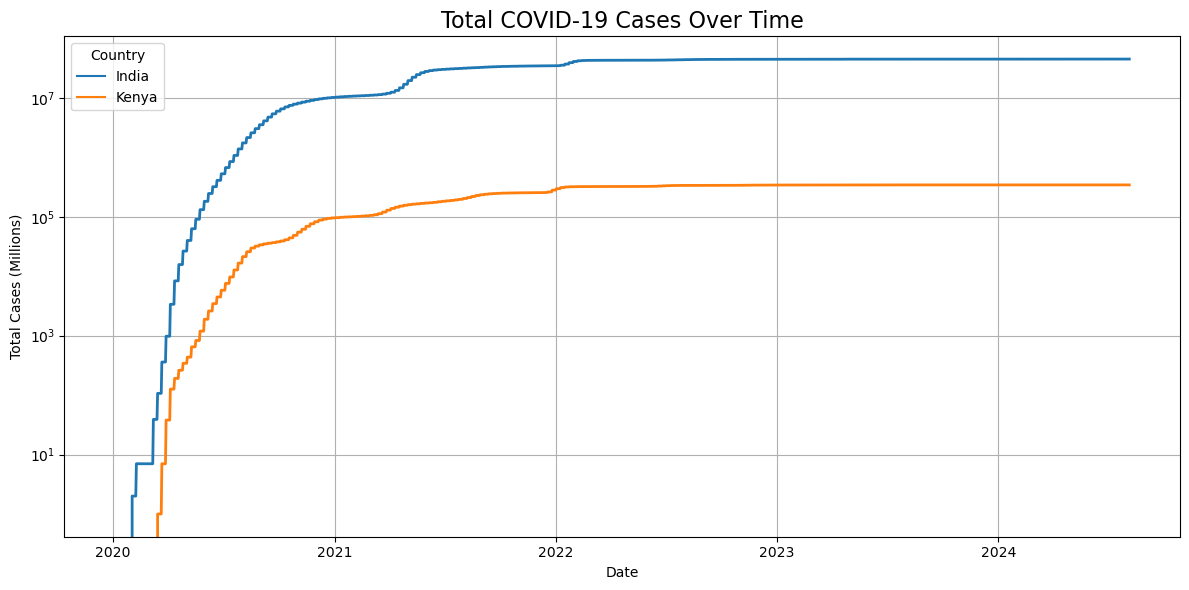

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="date",
    y="total_cases",
    hue="location",
    linewidth=2,
    palette=["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green
)
plt.title("Total COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Cases (Millions)")
plt.yscale("log")  # Use log scale if cases vary widely
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show() 

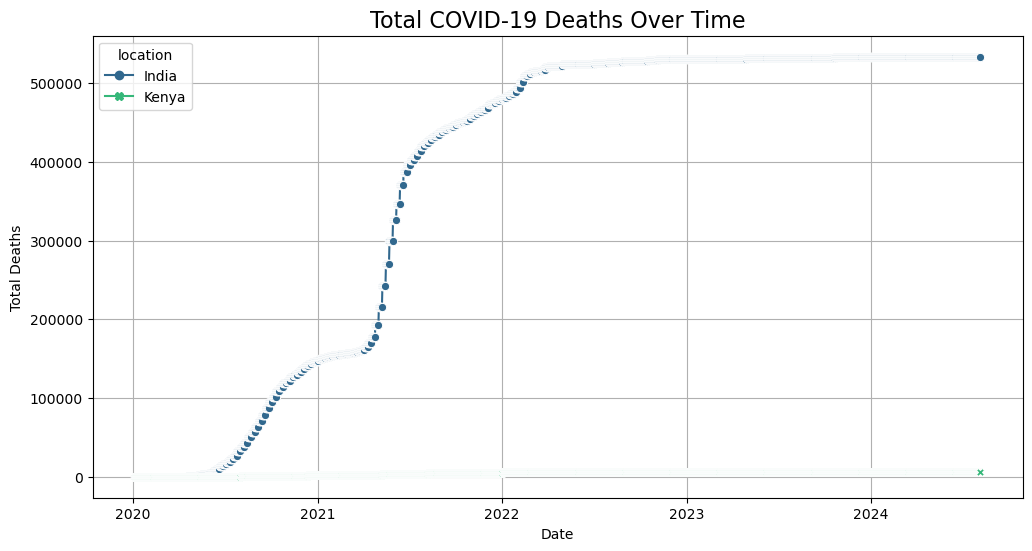

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="date",
    y="total_deaths",
    hue="location",
    style="location",  # Different line styles
    dashes=False,
    markers=True,      # Add markers for key dates
    palette="viridis"  # Colorblind-friendly
)
plt.title("Total COVID-19 Deaths Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()

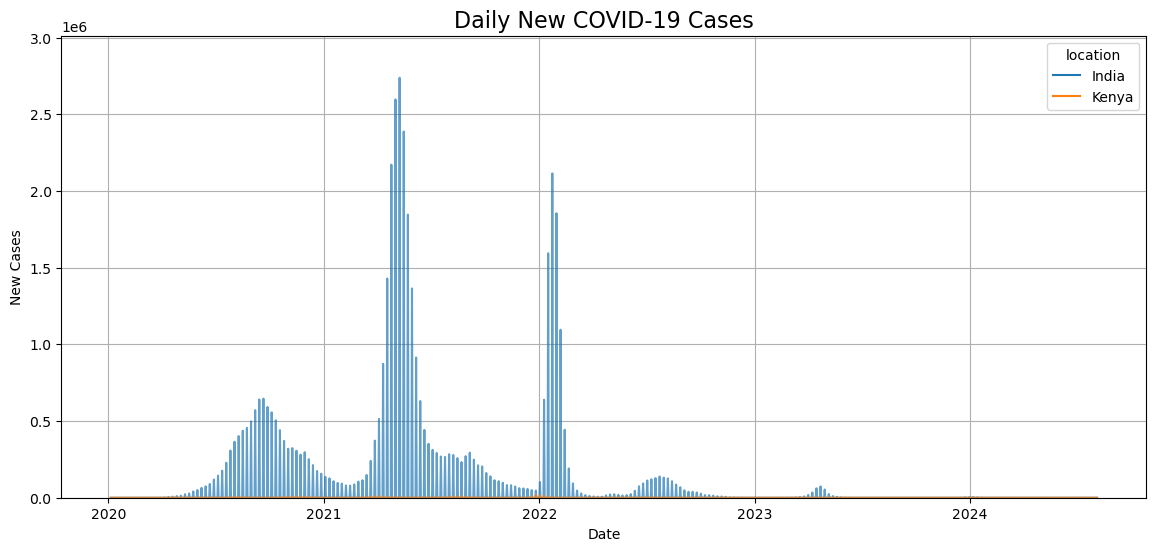

In [18]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df,
    x="date",
    y="new_cases",
    hue="location",
    errorbar=None,  # Replaces `ci=None` (new syntax)
    alpha=0.7,
    linewidth=1.5,
)
plt.title("Daily New COVID-19 Cases", fontsize=16)
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.ylim(0, df["new_cases"].max() * 1.1)
plt.grid(True)
plt.show()

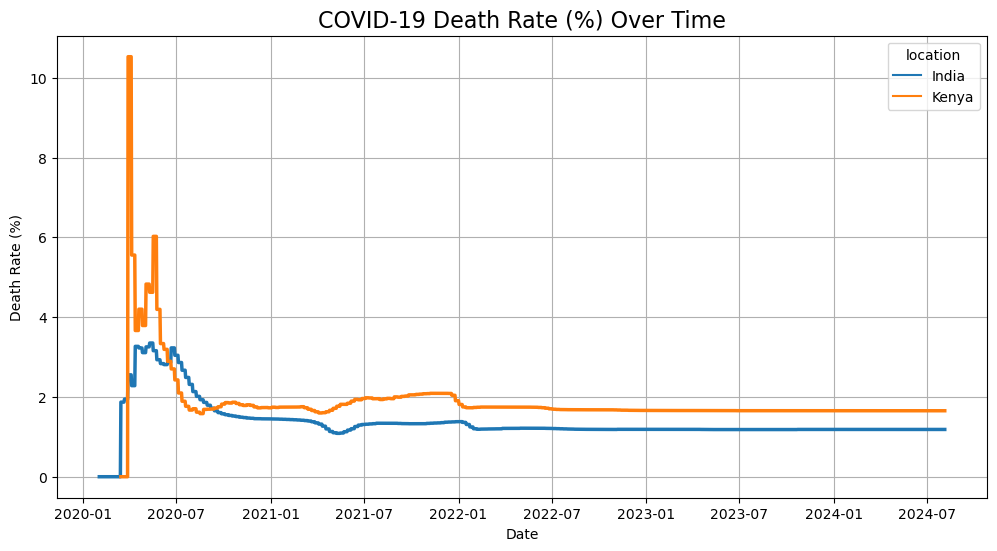

In [19]:
df["death_rate"] = (df["total_deaths"] / df["total_cases"]) * 100  # As percentage

# Plot death rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="date",
    y="death_rate",
    hue="location",
    linewidth=2.5,
)
plt.title("COVID-19 Death Rate (%) Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (%)")
plt.grid(True)
plt.show()

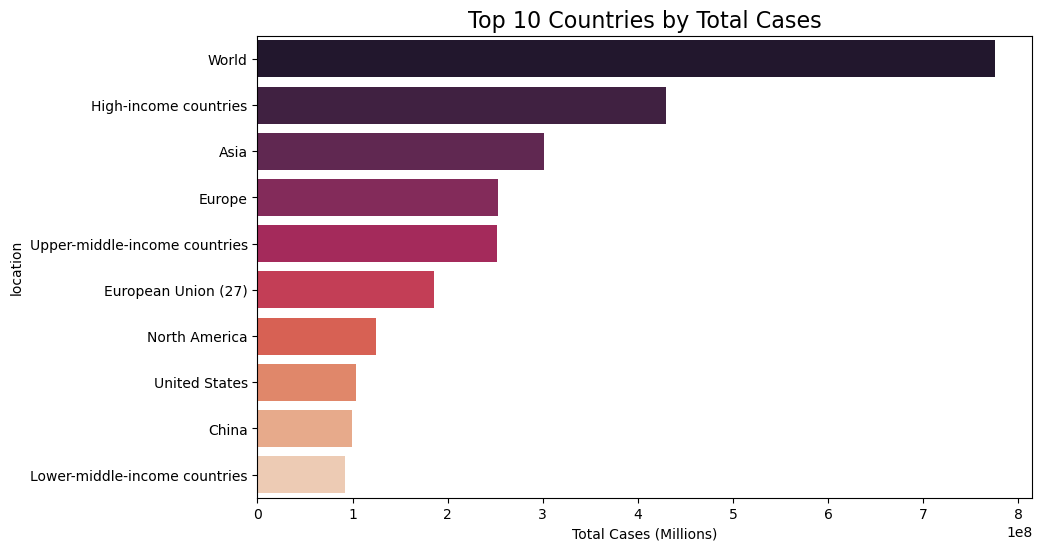

In [21]:
df = pd.read_csv("owid-covid-data.csv")

top_countries = df.groupby("location")["total_cases"].max().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette="rocket",  # Color gradient
    orient="h",
)
plt.title("Top 10 Countries by Total Cases", fontsize=16)
plt.xlabel("Total Cases (Millions)")
plt.show()

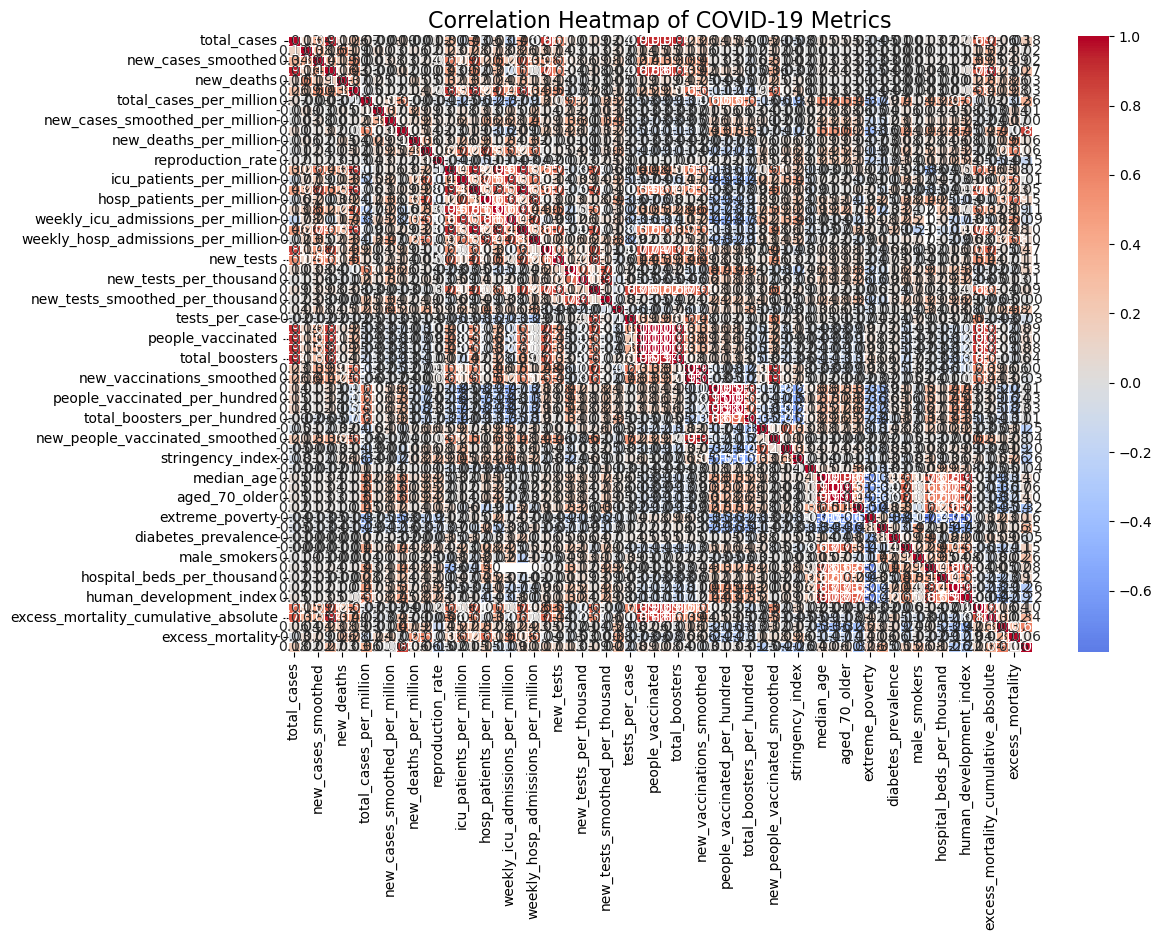

In [22]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Correlation Heatmap of COVID-19 Metrics", fontsize=16)
plt.show()

In [23]:
df = pd.read_csv("cleaned_covid_data.csv")
df['date'] = pd.to_datetime(df['date'])

# Select countries of interest
countries = ["Kenya", "Canada", "India"]
df = df[df['location'].isin(countries)]

/tmp/ipykernel_181/1395415959.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(


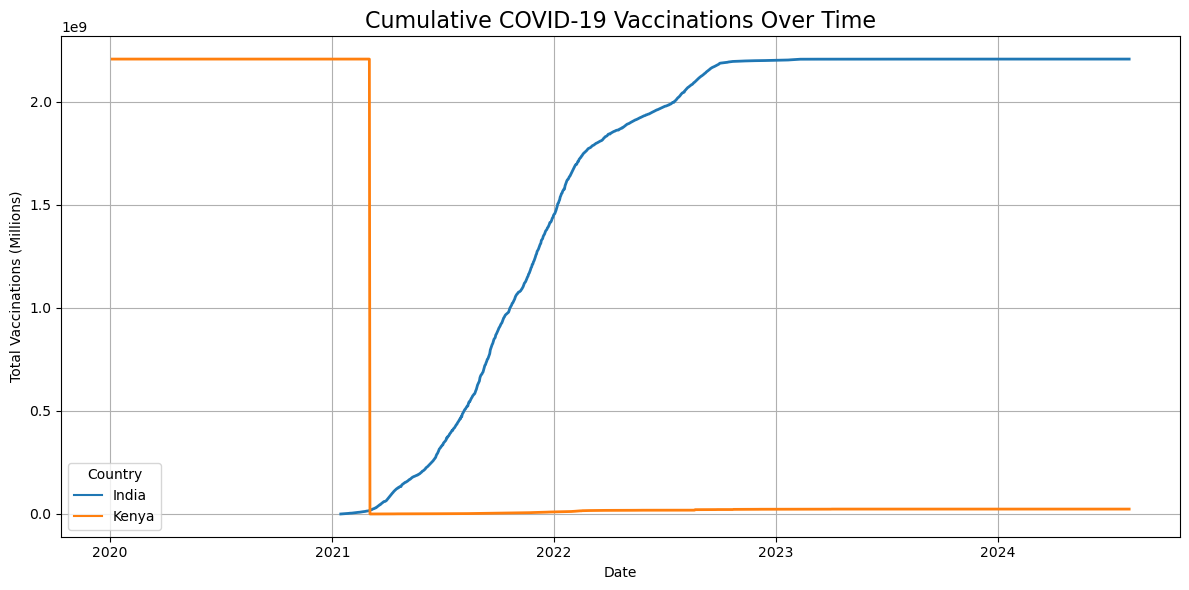

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='date',
    y='total_vaccinations',
    hue='location',
    errorbar=None,
    linewidth=2,
    palette=['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
)
plt.title('Cumulative COVID-19 Vaccinations Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Vaccinations (Millions)')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

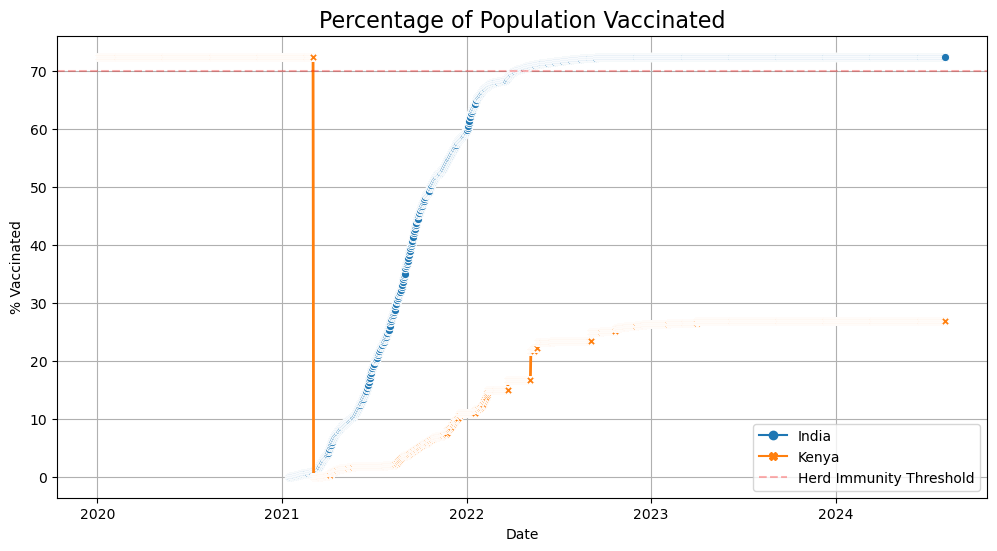

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='date',
    y='people_vaccinated_per_hundred',
    hue='location',
    errorbar=None,
    linewidth=2,
    style='location',
    markers=True,
    dashes=False
)
plt.title('Percentage of Population Vaccinated', fontsize=16)
plt.xlabel('Date')
plt.ylabel('% Vaccinated')
plt.grid(True)
plt.axhline(70, color='red', linestyle='--', alpha=0.3, label='Herd Immunity Threshold')
plt.legend()
plt.show()

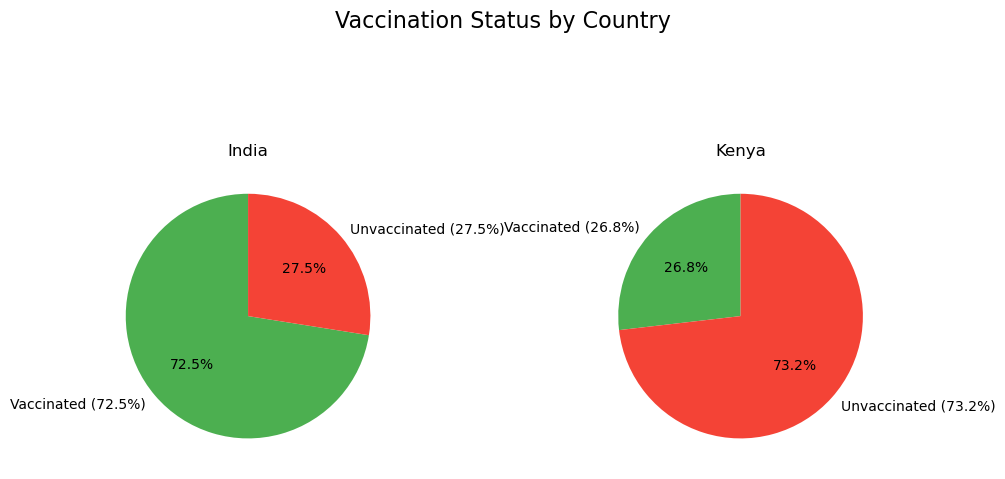

In [27]:
# Get latest non-null vaccination data for each country
latest = df.dropna(subset=['people_vaccinated_per_hundred'])\
          .sort_values('date')\
          .groupby('location').tail(1)

# Only plot countries that have data
countries_with_data = latest['location'].unique()

if len(countries_with_data) > 0:
    fig, axes = plt.subplots(1, len(countries_with_data), figsize=(5*len(countries_with_data), 6))
    fig.suptitle('Vaccination Status by Country', fontsize=16)
    
    for i, country in enumerate(countries_with_data):
        country_data = latest[latest['location'] == country].iloc[0]
        vaccinated = country_data['people_vaccinated_per_hundred']
        unvaccinated = 100 - vaccinated
        
        axes[i].pie(
            [vaccinated, unvaccinated],
            labels=[f'Vaccinated ({vaccinated:.1f}%)', f'Unvaccinated ({unvaccinated:.1f}%)'],
            colors=['#4CAF50', '#F44336'],
            autopct='%1.1f%%',
            startangle=90
        )
        axes[i].set_title(country)
    
    plt.tight_layout()
    plt.show()
else:
    print("No vaccination data available for the selected countries.")

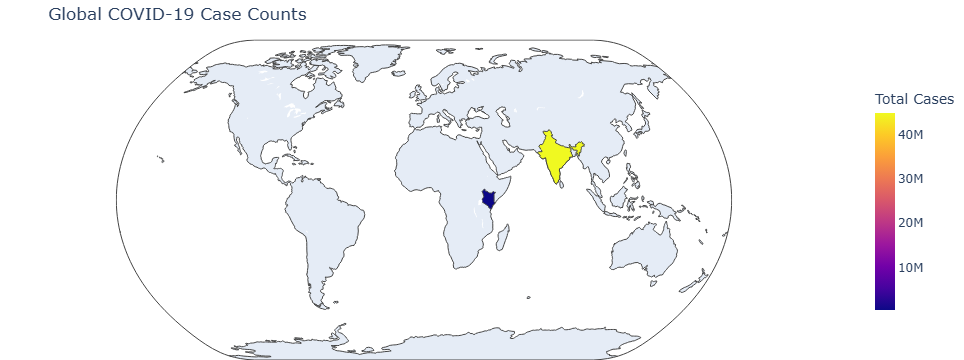

In [28]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv("cleaned_covid_data.csv")
df['date'] = pd.to_datetime(df['date'])

# 1. Prepare the data - Get latest record for each country
latest_data = df.sort_values('date').groupby('iso_code').tail(1)

# 2. Create the choropleth map
fig = px.choropleth(
    latest_data,
    locations="iso_code",    # Column containing ISO country codes
    color="total_cases",     # Values to color by
    hover_name="location",   # Column to show in hover
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Global COVID-19 Case Counts",
    labels={'total_cases': 'Total Cases'},
    projection="natural earth"
)

# 3. Customize the layout
fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Total Cases",
        thickness=20,
        len=0.75
    )
)

fig.show()